Initial Imports

In [6]:
import torch
import pandas as pd
import numpy as np
from torchvision.datasets import MNIST

In [7]:
mnist_trainset = MNIST('./data', download=True, train=True, transform=None)

Initial dataset visualing

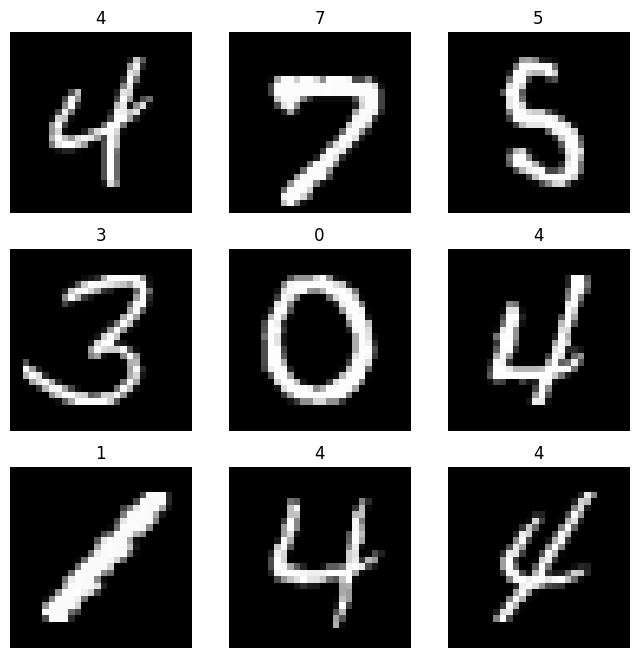

In [8]:
import matplotlib.pyplot as plt

def image_grid(image_dataset, rows = 6, columns = 6):
    figure = plt.figure(figsize=(8,8))

    no_of_pictures = rows * columns

    for i in range(1, columns * rows + 1):
        sample_idx = torch.randint(len(image_dataset), size=(1,)).item()
        img, label = image_dataset[sample_idx]
        figure.add_subplot(rows, columns, i)
        plt.title(label)
        plt.axis('off')
        plt.imshow(img, cmap="gray")
    plt.show()

image_grid(mnist_trainset, 3, 3)

Building the first neural network model

In [9]:
from torch.utils.data import DataLoader
from torch import nn

train_dataloader = DataLoader(
    dataset=mnist_trainset,
    batch_size=64,
    shuffle=True,
    num_workers=6,
)

Building the neural network - 1 hidden layers

In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=10, bias=True)
  )
)
